In [54]:
from PIL import Image
import requests
import io
import warnings
from itertools import *

def fetch():
    ib = requests.get("http://wind.met.fu-berlin.de/loops/radar_100/R.NEW.gif")
    return Image.open(io.BytesIO(ib.content))

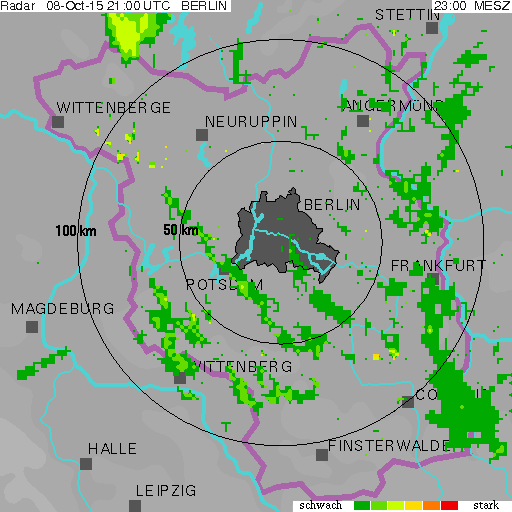

In [7]:
img = fetch()
img

In [68]:
colors = {v:k for k,v in {
    'l0':        (0x00, 0xaa, 0x00),
    'l1':        (0x64, 0xdc, 0x00), 
    'l2':        (0xc8, 0xff, 0x00),
    'l3':        (0xff, 0xdc, 0x00),
    'l4':        (0xff, 0x78, 0x00),
    'l5':        (0xf0, 0x00, 0x00),
    'legend_bg': (0xff, 0xff, 0xff),
    'graphical': (0x00, 0x00, 0x00),
    'info_text': (0x19, 0x19, 0x19),
    'water':     (0x50, 0xd2, 0xd2),
    'border':    (0xaa, 0x64, 0xaa),
    'city':      (0x55, 0x55, 0x55)
}.items()}

gray = lambda g: (g, g, g)

color_map = {
    'l0':        gray(0x50),
    'l1':        gray(0x70),
    'l2':        gray(0x90),
    'l3':        gray(0xb0),
    'l4':        gray(0xd0),
    'l5':        gray(0xf0),
    'legend_bg': gray(0x00),
    'graphical': gray(0xc0),
    'info_text': gray(0xc0),
    'water':     gray(0x40),
    'border':    gray(0x90),
    'city':      gray(0x80)
}

In [71]:
def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

def map_color(c):
    try:
        return color_map[c]
    except KeyError:
        r, g, b = c
        if r == g and g == b:
            c = int(r*0.2)
            return c, c, c
        warnings.warn('Unmapped color: {}'.format(c))
        return 0xff, 0, 0xff

def recolor(img):
    pal = grouper(img.getpalette(), 3)
    named = (colors.get(c, c) for c in pal)
    newpal = (map_color(c) for c in named)
    newimg = img.copy()
    newimg.putpalette(list(chain.from_iterable(newpal)))
    return newimg

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:15: UserWarning: Unmapped color: (0, 2, 0)


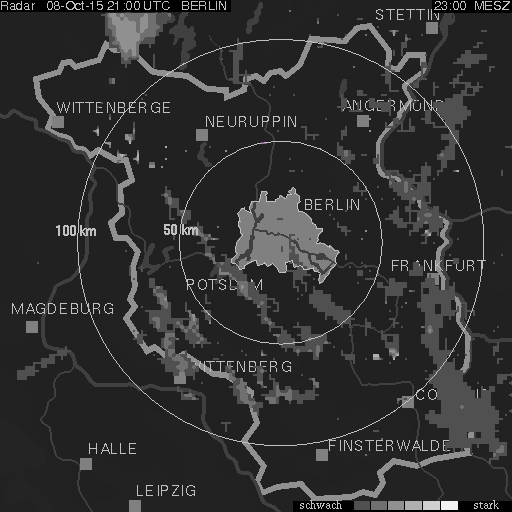

In [72]:
rec = recolor(img)
rec